In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("quikr_car (1).csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
df.shape

(892, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.duplicated().sum()

94

In [6]:
df=df.drop_duplicates()
df.shape

(798, 6)

In [7]:
df=df.dropna()
df.shape

(745, 6)

In [8]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [9]:
df.shape

(745, 6)

In [10]:
car=df.copy()

## Cleaning

### removing non numeric values from year and converting it to integer

In [11]:
df=df[df['year'].str.isnumeric()]
df['year']=df['year'].astype(int)

## Price cleaning 

In [12]:
df=df[df['Price']!='Ask For Price']
df['Price']=df['Price'].str.replace(',','').astype(int)
df.shape

(724, 6)

## Kms_driven Cleaning

In [13]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)
# type(df['kms_driven'])
# (df['Price'])

In [14]:
# df.shape
df.head(3)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol


## name cleaning

In [15]:
df['name'].nunique()

463

In [16]:
df.sample(3)

,name,company,year,Price,kms_driven,fuel_type
517,Hyundai Eon D Lite Plus,Hyundai,2016,120000,87000,Petrol
89,Hyundai Verna Transform SX VTVT,Hyundai,2008,160000,45000,Petrol
672,Maruti Suzuki S Cross Sigma 1.3,Maruti,2016,615000,21000,Diesel


In [17]:
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [18]:
df=df.reset_index(drop=True)

In [19]:
df.shape

(724, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    int32 
 3   Price       724 non-null    int32 
 4   kms_driven  724 non-null    int32 
 5   fuel_type   724 non-null    object
dtypes: int32(3), object(3)
memory usage: 25.6+ KB


In [21]:
df.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


<Axes: >

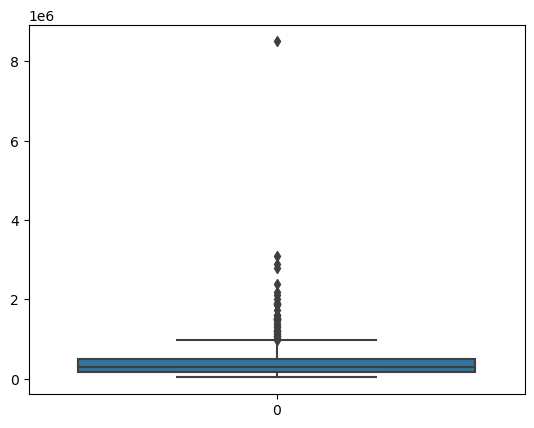

In [22]:
sns.boxplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

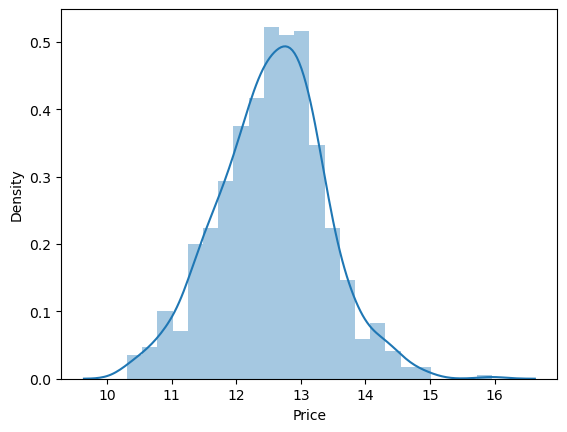

In [23]:
sns.distplot(np.log(df['Price']))

<Axes: >

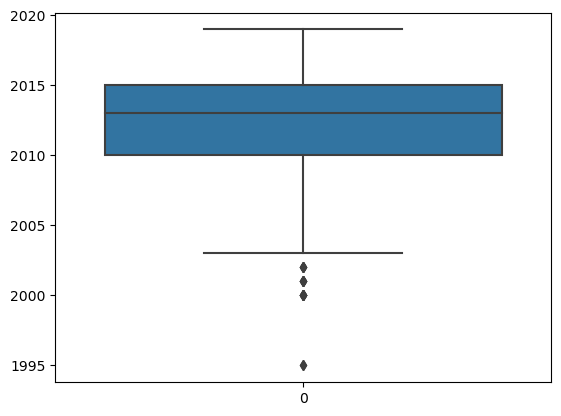

In [24]:
sns.boxplot(df['year'])

<Axes: >

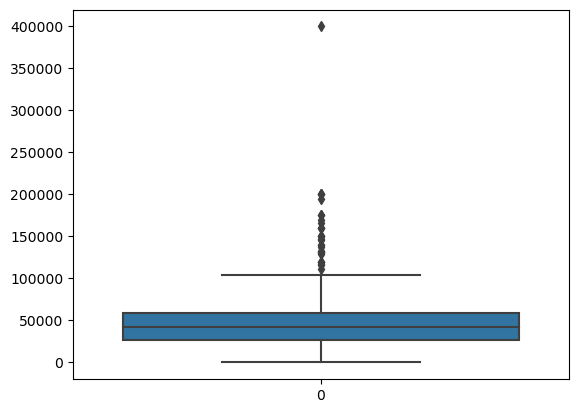

In [25]:
sns.boxplot(df['kms_driven'])

In [26]:
df=df[df['Price']<5e6].reset_index(drop=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
718,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
719,Tata Indica V2,Tata,2009,110000,30000,Diesel
720,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
721,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [27]:
# name_counts = df['name'].value_counts()
# df[df['name'].isin(name_counts[name_counts==1].index)]
df['name'].value_counts()


name
Maruti Suzuki Swift         46
Maruti Suzuki Alto          40
Maruti Suzuki Wagon         26
Maruti Suzuki Ertiga        15
Hyundai Santro Xing         14
                            ..
Hyundai Sonata Transform     1
Nissan Micra XV              1
Chevrolet Beat               1
Volkswagen Vento Konekt      1
Tata Zest XM                 1
Name: count, Length: 254, dtype: int64

In [28]:
# df['name'].nunique()
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
718,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
719,Tata Indica V2,Tata,2009,110000,30000,Diesel
720,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
721,Tata Zest XM,Tata,2018,260000,27000,Diesel


## Converting cleaned to CSV

In [29]:
df.to_csv('Cleaned_Car_data.csv')

# Model

In [30]:
# X= df.drop(columns='name','Price')
# y = np.log(df['Price'])

X = df.drop(columns=['Price'])
y=df['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [31]:
print(X_train.shape)
print(X_test.shape)

(542, 5)
(181, 5)


In [32]:
X_test.shape
X_test

,name,company,year,kms_driven,fuel_type
458,BMW 5 Series,BMW,2009,37518,Petrol
601,Hyundai Getz GLE,Hyundai,2007,55000,Petrol
129,Fiat Punto Emotion,Fiat,2012,37200,Diesel
108,Hyundai i20 Asta,Hyundai,2009,65480,Petrol
650,Maruti Suzuki Swift,Maruti,2009,90000,Diesel
...,...,...,...,...,...
621,Hyundai Eon,Hyundai,2014,28000,Petrol
660,Hyundai Creta,Hyundai,2016,60000,Diesel
12,Audi A8,Audi,2017,4000,Petrol
171,Hyundai Grand i10,Hyundai,2014,20000,Petrol


In [33]:
# ohe=OneHotEncoder()
# ohe.fit_transform(X_train[['name','company','fuel_type']])
# # ohe.transform(X_test[['name','company','fuel_type']])

In [34]:
X_test

,name,company,year,kms_driven,fuel_type
458,BMW 5 Series,BMW,2009,37518,Petrol
601,Hyundai Getz GLE,Hyundai,2007,55000,Petrol
129,Fiat Punto Emotion,Fiat,2012,37200,Diesel
108,Hyundai i20 Asta,Hyundai,2009,65480,Petrol
650,Maruti Suzuki Swift,Maruti,2009,90000,Diesel
...,...,...,...,...,...
621,Hyundai Eon,Hyundai,2014,28000,Petrol
660,Hyundai Creta,Hyundai,2016,60000,Diesel
12,Audi A8,Audi,2017,4000,Petrol
171,Hyundai Grand i10,Hyundai,2014,20000,Petrol


In [35]:
step1 = ColumnTransformer([('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,4]),
                                       ],remainder='passthrough')
# step2 = ColumnTransformer(['scale', MinMaxScaler()])
# step2= StandardScaler()

# step3=LinearRegression()
step3=DecisionTreeRegressor()

pipe=Pipeline([
    ('step1',step1),
#     ('step2',step2),
    ('step3',step3)
])
# pipe= make_pipeline(step1, step2, step3)

pipe.fit(X_train,y_train)
# step1
# X_test_trans=trans.transform(X_test)

# regressor.fit(X_train_trans,y_train)
# # transformer.transform(X_test)

# y_pred=regressor.predict(X_test_trans)


# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))
# X_train_trans
y_pred=pipe.predict(X_test)
# y_pred=np.exp(y_pred.cumsum())
# y_pred

In [36]:
# print("accuracy score: ",accuracy_score(y_test,y_pred))
# print("confusion matrix : ",confusion_matrix(y_test,y_pred))
r2_score(y_test,y_pred)

0.34954753311739495

In [37]:
y_=pipe.predict([['Maruti Suzuki Baleno Delta 1.2','Maruti Suzuki',2023,1100,'Petrol']])
# y_=y_.reshape(1,1)
print(type(y_))
print(y_.ndim)
y_.shape
y_test
y_

<class 'numpy.ndarray'>
1


array([610000.])

In [38]:
np.exp(y_.cumsum())

array([inf])